In [1]:
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import numpy as np
import math
%matplotlib notebook

In [257]:
def pull_screen():
    os.popen("adb shell screencap -p /sdcard/1.png")
    time.sleep(0.5)
    os.popen("adb pull /sdcard/1.png .")
    time.sleep(0.5)

In [3]:
def jump(distance, fac):
    press_time=distance*fac
    press_time=int(press_time)
    cmd="adb shell input swipe 100 100 150 150 "+str(press_time)
    swipe=os.popen(cmd)

In [37]:
# do not use unless need new template
# def split_player(img_cv, hsv, write_to_file=False):
#     # detect the player
#     # Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
#     lower_player = np.array([20,50,50])
#     upper_player = np.array([160,255,255])
#     mask = cv2.inRange(hsv, lower_player, upper_player)
#     res = cv2.bitwise_and(img_cv,img_cv, mask= mask)
#     player = img_cv[900:1150, 250:400]
#     if write_to_file is True:
#         plt.imshow(player)
#         cv2.imwrite("template_player.png",player)

In [4]:
def find_player(img_cv, template_player):
    h, w= template_player.shape[:-1]
    # img_detected=img_cv.copy()
    res = cv2.matchTemplate(img_cv,template_player,cv2.TM_CCOEFF)
    _, _, _, max_loc = cv2.minMaxLoc(res)
    player_loc=(max_loc[0]+90,max_loc[1]+200)
    # top_left = max_loc
    # bottom_right = (top_left[0] + w, top_left[1] + h)
    # cv2.line(img_detected,top_left,bottom_right,(255,0,0),5)
    # cv2.rectangle(img_detected,top_left, bottom_right, (255,0,0), 10)
    return player_loc

In [141]:
def find_next1(img_cnt, gray, hsv, player_loc):
#     lower = np.array([0,0,0])
#     higher = np.array([179,0,255])
#     flt = cv2.inRange(hsv, lower, higher);
#     ret,thresh3 = cv2.threshold(gray,155,255,cv2.THRESH_TOZERO)
#     ret3,thresh3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     thresh3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    _, contours0, hierarchy = cv2.findContours(flt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_cnt,contours0, -1, (0,255,0), 3)
    for cnt in contours0:
        area = cv2.contourArea(cnt)
        x,y,w,h = cv2.boundingRect(cnt)
        loc_tmp=(x+int(h/2),y+int(w/3))
        print("[DEBUG][find_next] x,y,w,h ",x,y,w,h)
        print("[DEBUG][find_next] area ",area)
        print("[DEBUG][find_next] player_loc ",player_loc)
        if 10000<area<1000000 and loc_tmp[1]<player_loc[1]:
            print("[DEBUG][find_next] VALID x,y,w,h ",x,y,w,h)
            print("[DEBUG][find_next] VALID player_loc ",player_loc)
            cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(255,0,0),10)
            return loc_tmp, img_cnt,flt
    return -1, img_cnt,flt

In [149]:
def find_next2(img_cv):
    # img_detected=img_cv.copy()
    edges = cv2.Canny(img,100,200)
    # cv2.line(img_cv,top_left,bottom_right,(255,0,0),5)
    # cv2.rectangle(img_cv,top_left, bottom_right, (255,0,0), 10)
    return obj_loc

In [45]:
def distance(x,y):
    return int(math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2))

<IPython.core.display.Javascript object>


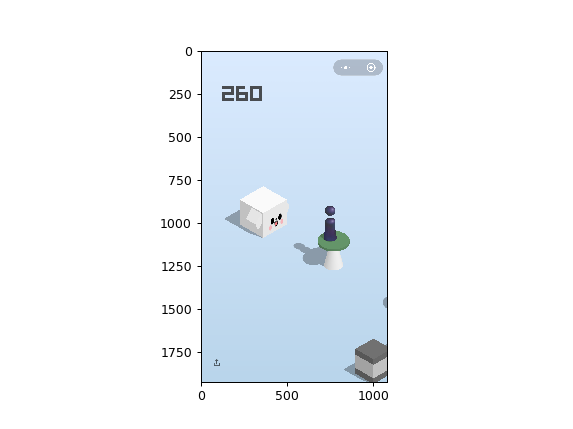

In [545]:
pull_screen()
img_pil=Image.open("1.png")
img_np=np.array(img_pil)
plt.figure()
plt.imshow(img_np)

[DEBUG][main] player_loc  (750, 1076)


<IPython.core.display.Javascript object>


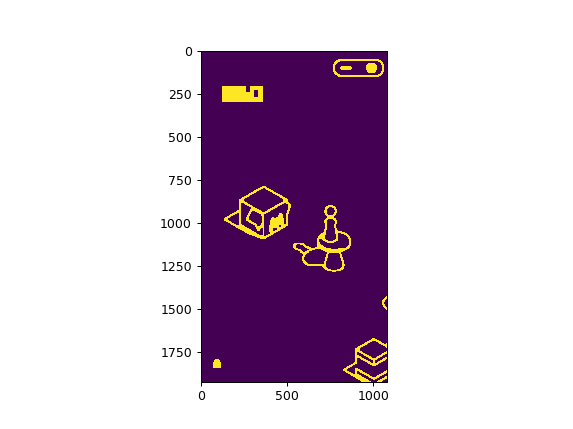

[DEBUG][main] VALID area  18209.0
[DEBUG][main] VALID perimeter  2477.762746453285
[DEBUG][main] VALID area  57500.5
[DEBUG][main] VALID perimeter  1436.212327003479
[DEBUG][main] VALID area  8629.0
[DEBUG][main] VALID perimeter  531.2447280883789
[DEBUG][main] VALID area  73818.0
[DEBUG][main] VALID perimeter  1144.9402486085892
[DEBUG][main] VALID area  16922.0
[DEBUG][main] VALID perimeter  584.9015824794769
[DEBUG][main] VALID area  8363.5
[DEBUG][main] VALID perimeter  663.9137753248215
[DEBUG][main] VALID area  17563.0
[DEBUG][main] VALID perimeter  607.6366447210312
[DEBUG][main] VALID area  6239.5
[DEBUG][main] VALID perimeter  528.3847759962082
[DEBUG][main] VALID area  28390.0
[DEBUG][main] VALID perimeter  732.7350645065308
[DEBUG][main] VALID area  21464.0
[DEBUG][main] VALID perimeter  658.3919172286987


<IPython.core.display.Javascript object>


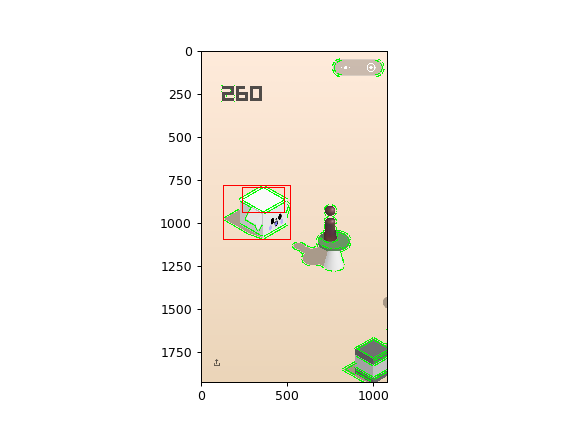

[DEBUG][main] next_loc  (360, 862)


<IPython.core.display.Javascript object>


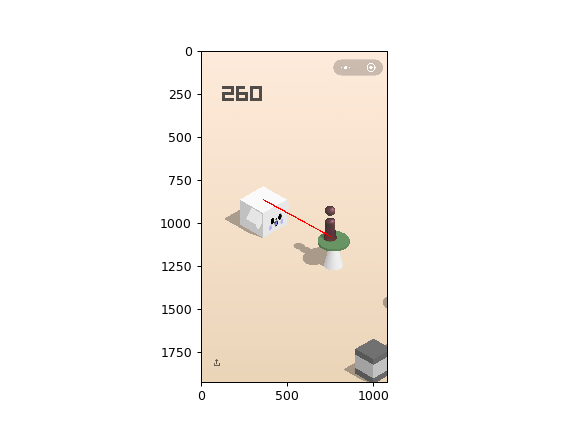

In [546]:
%matplotlib notebook
# load image
img_cv = cv2.imread('1.png')
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

# find player's current position
template_player = cv2.imread('template_player.png')
player_loc=find_player(img_cv, template_player)
print("[DEBUG][main] player_loc ",player_loc)

# find next position
edges = cv2.Canny(img_cv,50,200)
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
plt.figure()
plt.imshow(closing)
blur = cv2.GaussianBlur(closing,(5,5),0)
image, contours, hierarchy = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_cnt=img_cv.copy()
next_loc_y=2000
next_loc=(0,0)
for cont in contours:
    area = cv2.contourArea(cont)
    perimeter = cv2.arcLength(cont,True)
    if 5000<area<80000 and 500<perimeter<10000:
        print("[DEBUG][main] VALID area ",area)
        print("[DEBUG][main] VALID perimeter ",perimeter)
        cv2.drawContours(img_cnt, cont, -1, (0,255,0), 5)
        x,y,w,h = cv2.boundingRect(cont)
        new_loc=(x+int(w/2),y+int(h/2))
        if 250<new_loc[1]<player_loc[1] and new_loc[1]<next_loc_y:
            next_loc_y=new_loc[1]
            next_loc=new_loc
            cv2.rectangle(img_cnt,(x,y),(x+w,y+h),(255,0,0),5)
plt.figure()
plt.imshow(img_cnt)
print("[DEBUG][main] next_loc ",next_loc)

# plot result
img_res=img_cv.copy()
if next_loc is not -1:
    cv2.line(img_res,player_loc,next_loc,(255,0,0),5)

# plt.figure()
# plt.imshow(flt)
# plt.figure()
# plt.imshow(img_cnt)}
plt.figure()
plt.imshow(img_res)

<IPython.core.display.Javascript object>


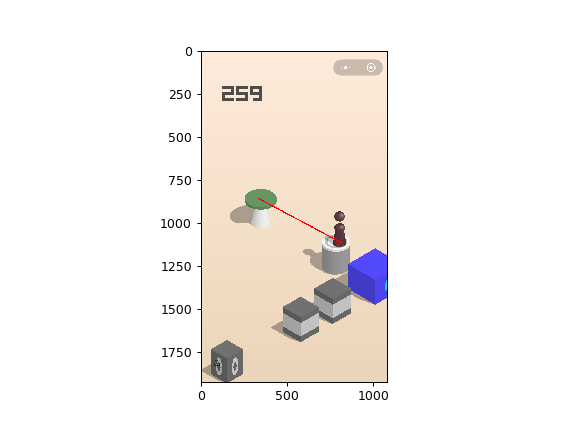

In [543]:
img_mod=img_cv.copy()
next_loc=(next_loc[0]+10,next_loc[1])
player_loc=(player_loc[0],player_loc[1])
cv2.line(img_mod,player_loc,next_loc,(255,0,0),5)
plt.figure()
plt.imshow(img_mod)

In [547]:
jump(distance(player_loc,next_loc), fac=1.5)